In [4]:
from PIL import Image
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import sys

project_root = os.path.abspath(os.path.join(os.curdir, '../../'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [74]:
set_type = "Validation"

data_path = f"C:\\Users\\pauli\\Repos\\Indeform_homework\\utils\\images_utils\\herring.v8i.coco\\valid"
annotations_path = f"C:\\Users\\pauli\\Repos\\Indeform_homework\\utils\\images_utils\\herring.v8i.coco\\valid\\_annotations.coco.json"

json_file = open(annotations_path)
annotations = json.load(json_file)

images = annotations["images"]

In [75]:
image_labels = [[] for _ in range(len(annotations["images"]))]
for label in annotations["annotations"]:
    image_labels[label["image_id"]].append(label)

In [76]:
print(images[0])

{'id': 0, 'license': 1, 'file_name': '1_2024-05-03_07-00-01_005_mp4-0504_jpg.rf.11554e9f9c389b2002af19d410bb29c0.jpg', 'height': 640, 'width': 640, 'date_captured': '2024-05-26T12:51:23+00:00'}


[4, 9, 552, 491]
[0, 498, 318, 142]


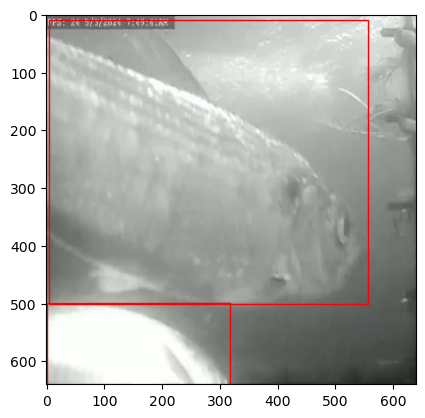

[356, 472, 229, 113]


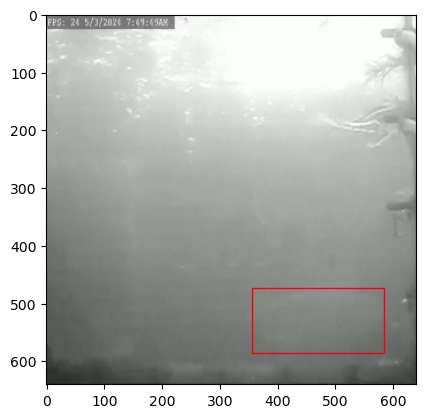

[494, 510, 146, 86]


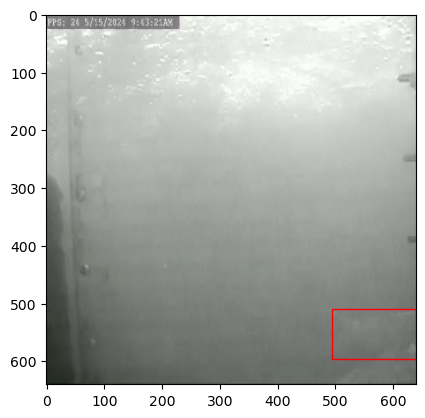

[0, 428, 356, 210]


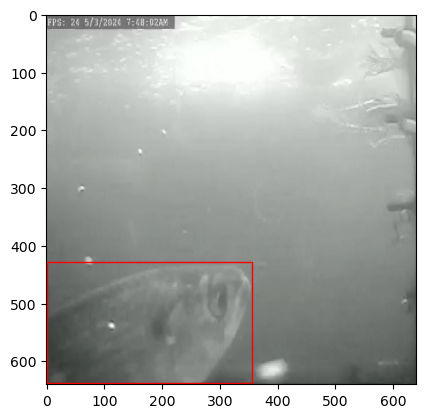

[0, 308, 170.5, 300]


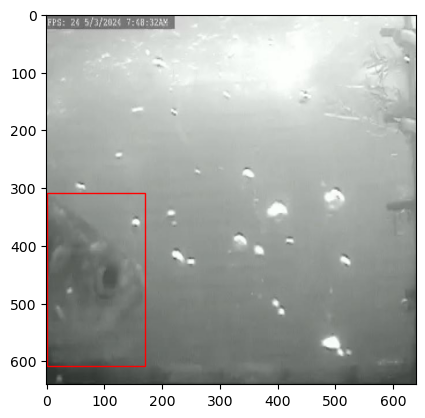

In [77]:
image_files = []

for i in range(5):
    image_data = images[i]
    labels = image_labels[i]
    image_path = os.path.join(data_path, image_data["file_name"])
    image = Image.open(image_path)
    image_files.append(image)
    fig, ax = plt.subplots()
    ax.imshow(image)
    for label in labels:
        bbox = label["bbox"]
        print(bbox)
        patch = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor="None")
        ax.add_patch(patch)

    plt.show()


In [6]:
from common.storage_client import storageClient

In [79]:
image_labels[0]

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [4, 9, 552, 491],
  'area': 271032,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 0,
  'category_id': 1,
  'bbox': [0, 498, 318, 142],
  'area': 45156,
  'segmentation': [],
  'iscrowd': 0}]

In [80]:
for i in range(len(image_labels)):
    image_data = images[i]
    labels = image_labels[i]
    
    image_path = os.path.join(data_path, image_data["file_name"])
    with open(image_path, "rb") as image:
        response = storageClient.post_image(image, image_data["file_name"])
        image_id = response.json()["id"]

        response = storageClient.post_dataset_entry(image_id, 1, set_type)

        for label in labels:
            bbox = label["bbox"]
            label_dict = {
                "Class": "Herring",
                "X": bbox[0],
                "Y": bbox[1],
                "W": bbox[2],
                "H": bbox[3] 
            }
            response = storageClient.post_label(label_dict, image_id)